<a href="https://colab.research.google.com/github/sanjaymkr/-Individual-_Bank_Marketing_Effectiveness_Prediction/blob/main/(Individual)_Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = ('/content/drive/MyDrive/Alma_Data/bank-full.csv')

# Load Dataset

In [ ]:
ndf = pd.read_csv(path, sep=';')

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Data Exploration

In [ ]:
#Check shape of dataset
ndf.shape

(45211, 17)

In [ ]:
ndf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# Looking at last five observations
ndf.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
# checking data-types of variables to identify the numerical and categorical variables
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# Counting the number of features belonging to each dataset
ndf.dtypes.value_counts()

object    10
int64      7
dtype: int64

In [ ]:
# Looking at the statistical values of numerical type features
ndf.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
ndf.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


#NAN or Missing Values

In [ ]:
# Summing null values of each feature
ndf.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
# Unique values in all columns
for column in ndf.columns:
    print(column,ndf[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


In [ ]:
# Checking duplicates
ndf.drop_duplicates(inplace=True)
ndf.shape

(45211, 17)

There are no null values and duplicate data.

In [ ]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical = [x for x in ndf.columns.to_list() if x not in categorical]
numerical.remove('y')

In [ ]:
print('Categorical features:', categorical)
print('Numerical features:', numerical)

Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


**EDA**

In [ ]:
ndf['y'].value_counts(normalize=True)*100

no     88.30152
yes    11.69848
Name: y, dtype: float64

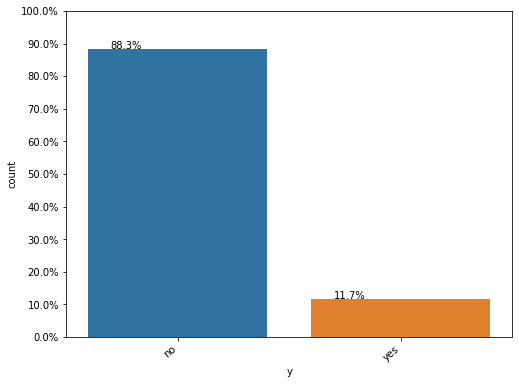

In [ ]:
  plt.figure(figsize=(8,6))
  Y = ndf["y"]
  total = len(Y)*1.
  ax=sns.countplot(x="y", data=ndf)
  for i in ax.patches:
    ax.annotate('{:.1f}%'.format(100*i.get_height()/total), (i.get_x()+0.1, i.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

From this data we can see that 88% customers did not subscribed for Term deposit

From the above plot we can observe that our dataset is highly imbalanced. Majority of the data points belong to no class. Ratio of No class to yes class is 8:1.

#Univariate Analysis

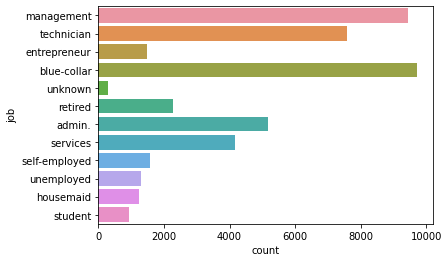

In [ ]:
sns.countplot(y='job', data=ndf)

we can see that most of the customers have jobs as "management", "blue-collar" or "technician".

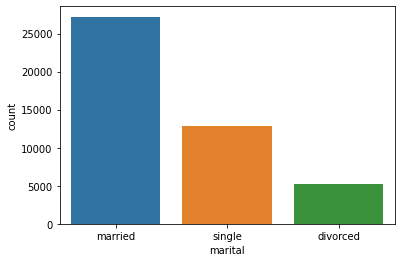

In [ ]:
sns.countplot(x='marital', data=ndf)

Client who married are high in records in given dataset and divorced are less

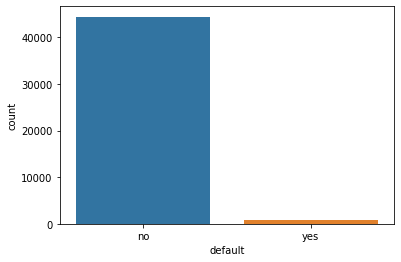

In [ ]:
sns.countplot(x='default', data=ndf)

defualt feature seems to be does not play important role as it has value of no at high ratio to value yes which can drop

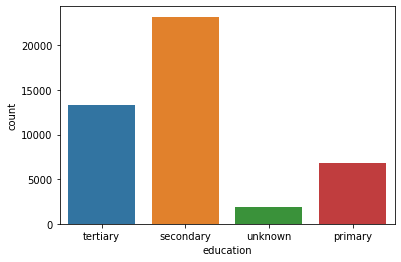

In [ ]:
sns.countplot(x='education', data=ndf)

education background is secondary are in high numbers in given dataset

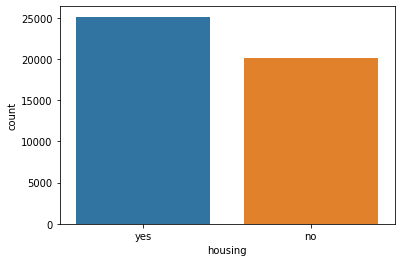

In [ ]:
sns.countplot(x='housing', data=ndf)

People with housing loan are the most ones

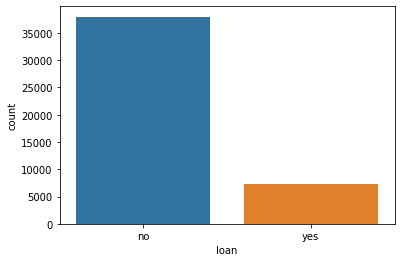

In [ ]:
sns.countplot(x='loan', data=ndf)

People with no personal loan are the most ones.

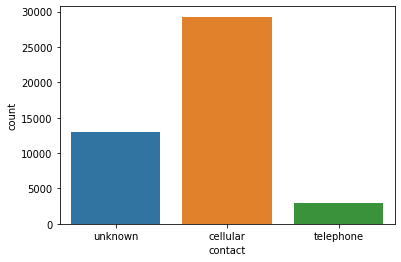

In [ ]:
sns.countplot(x='contact', data=ndf)

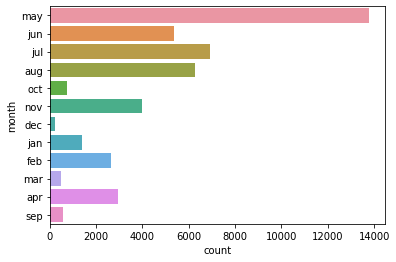

In [ ]:
sns.countplot(y='month', data=ndf)

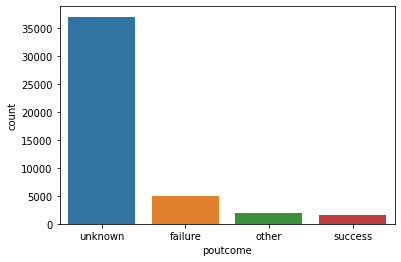

In [ ]:
sns.countplot(x='poutcome', data=ndf)

Data in month of may is high and less in Dec

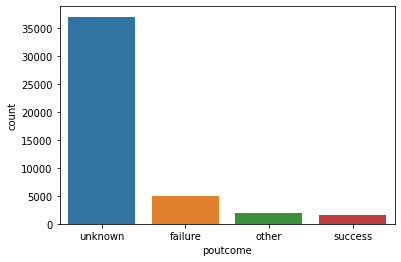

In [ ]:
sns.countplot(x='poutcome', data=ndf)

This feature indicates the outcome of the previous marketing campaign

Majority of the outcome of the previous campaign is Non-Existent. Very few people counts who successfully subscribed from previous marketing strategy.

In [ ]:
def plot_cat_data(ndf,dep_var):
  cat_columns = list(set(ndf.describe().columns)^set(ndf.columns))
  cat_columns.remove(dep_var)
  for i,e in enumerate(cat_columns):
    plt.figure(i)
    ax = sns.countplot(ndf[e],hue=ndf[dep_var])
    for p in ax.patches:
      height = p.get_height()
      ax.text(p.get_x()+p.get_width()/2.,
              height + 3,
              '{:1.2f}'.format(height/ndf.shape[0]),
              ha="center")
    if(len(ax.patches)>10):
      plt.xticks(rotation=90)  
    plt.title(f'Count Plot for {e}')
    plt.show()

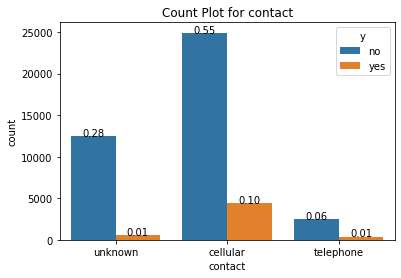

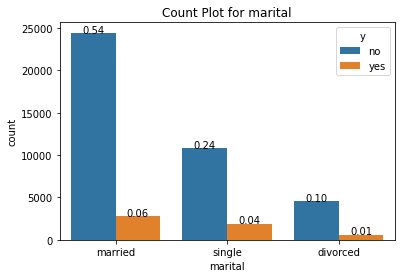

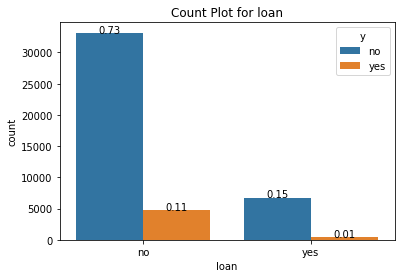

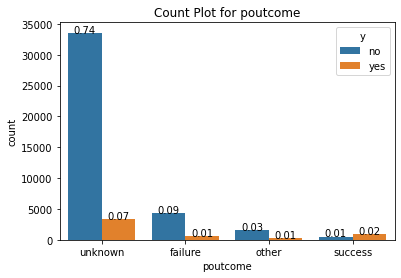

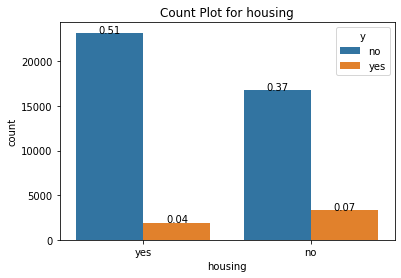

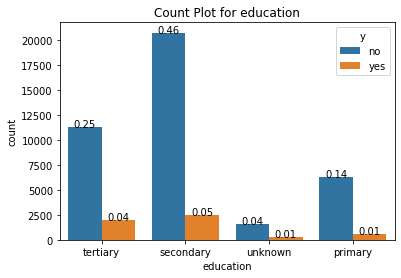

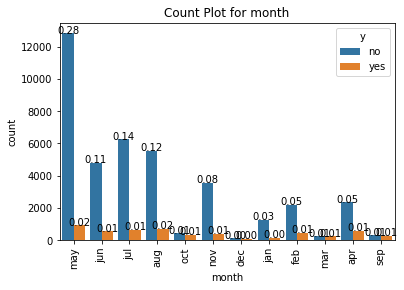

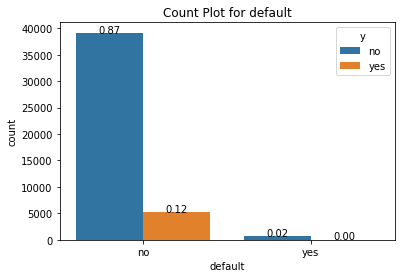

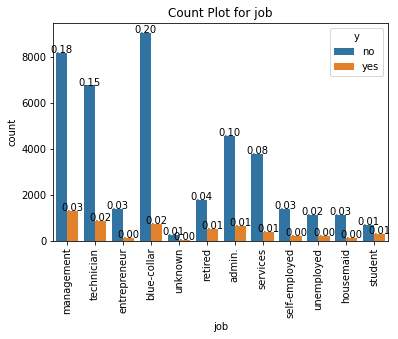

In [ ]:

plot_cat_data(ndf,'y')

* People with Secondary education qualification are the most who have subscribed for the deposits. They are also the most who have not subscribed for deposits.
* People with 'blue-collar' jobs have subscribed more for the deposits than people with any other profession
*People who are married have subscribed for deposits more than people with any other marital status.
*More people contacted on cellular by bank have subscribed the deposits offered by the bank than the ones contacted on telephone.
*The month of the highest level of marketing activity was the month of May. However, it was also the month that potential clients tended to reject term deposits offers the most.
*People with default status as no are the most one’s who have and have not subscribed for bank deposits.
*People with no housing loan are the most ones who have subscribed for deposits.Most ones who have not subscribed for the deposits are having housing loans.
*People with no personal loan are the most ones who have not subscribed for the deposits offered by the bank and they are also the most ones who have subscribed for the deposits
*People whose previous outcome is non-existent have actually subscribed more than any other group of people belonging to previous outcome



**Explore the Numerical Features**

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in ndf.columns if ((ndf[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
ndf[numerical_features].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [ ]:
discrete_feature=[feature for feature in numerical_features if len(ndf[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [ ]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['y']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


In [ ]:
# converting call duration from seconds to minute
ndf['duration'] = ndf['duration']/60

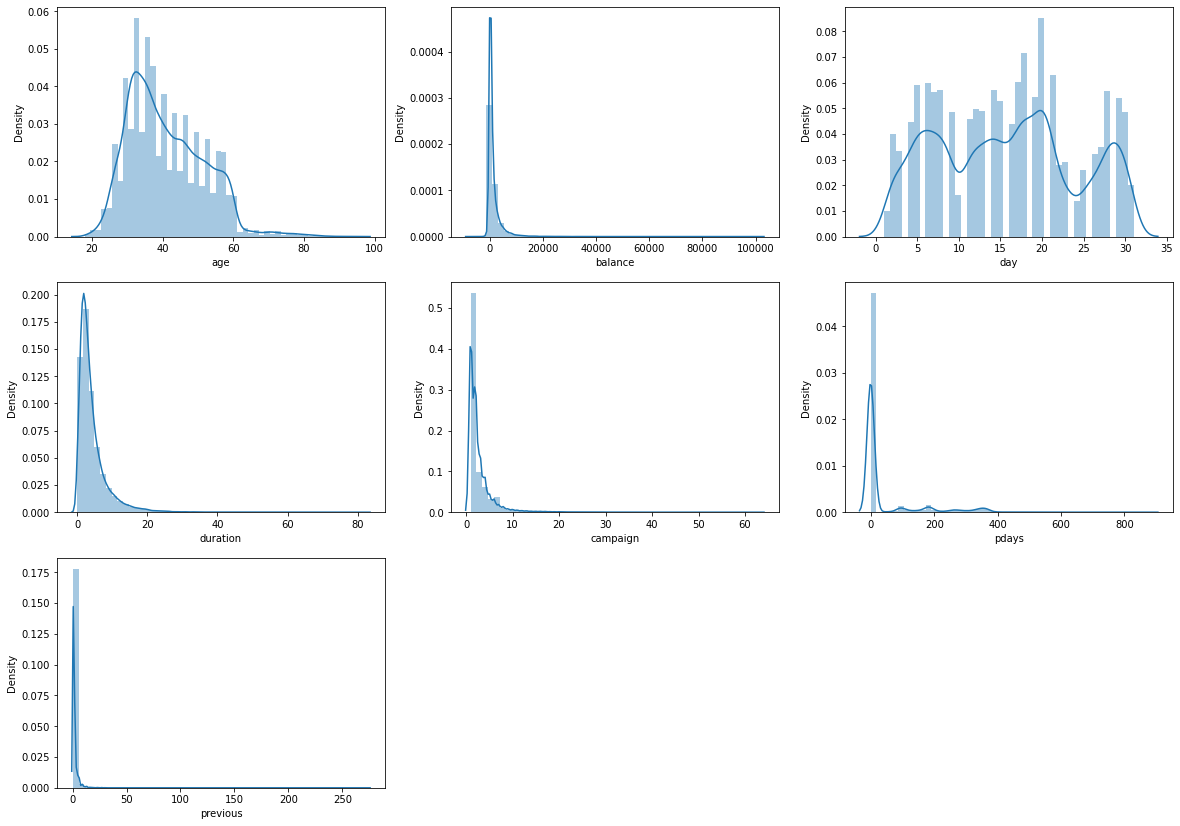

In [ ]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(ndf[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

* it seems age, days distributed normally
* balance, duration, campaign, pdays and previous heavily skewed towards left and seems to be have some outliers.
* As we can see in the above distribution also, that most of the customers are in the age range of 20-40

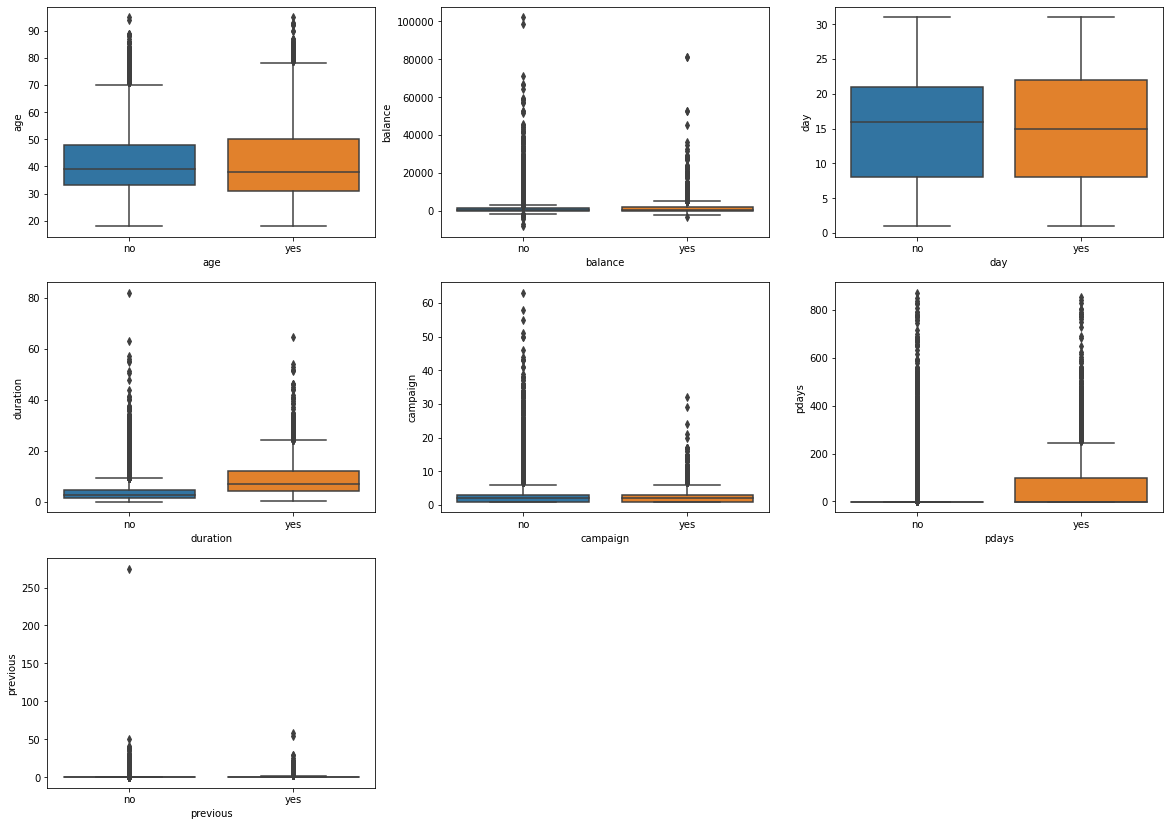

In [ ]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= ndf[feature], data=ndf)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

* Client shows interest on deposit who had discussion for longer duration
Both the customers that subscibed or didn't subscribe a term deposit.
* median age of around 38-40. And the boxplot for both the classes overlap quite a lot, which means that age isn't necessarily a good indicator for which customer will subscribe and which customer will not.

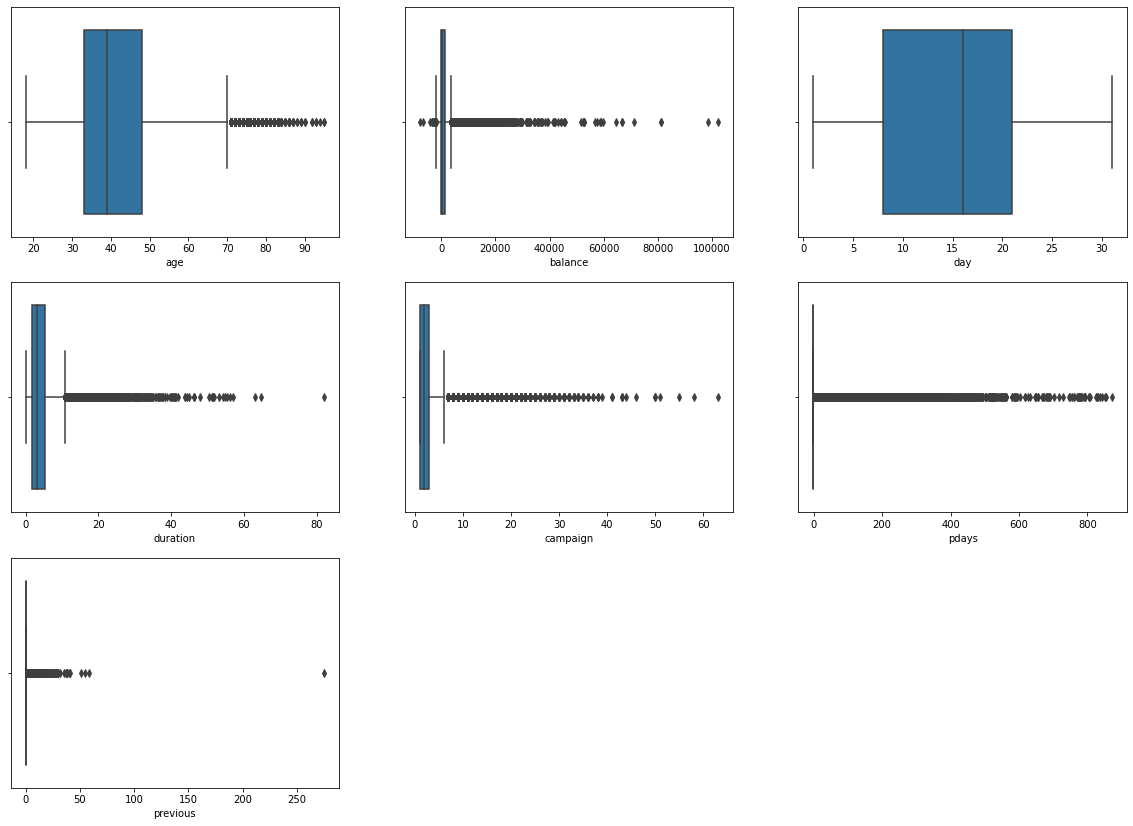

In [ ]:
# boxplot on numerical features to find outliers
plt.figure(figsize=(20,60))
plotnumber=1
for numerical_feature in numerical_features:
  ax = plt.subplot(12,3,plotnumber)
  sns.boxplot(ndf[numerical_feature])
  plt.xlabel(numerical_feature)
  plotnumber+=1
plt.show()

Age, Balance, Duration, Campaign, Pdays and Previous has some outliers

**Correlation Matrix of the numerical features**

In [ ]:
# Convert target variable into numeric
ndf.y = ndf.y.map({'no':0, 'yes':1}).astype('uint8')

Text(0.5, 1.05, 'Pearson correlation of Features')

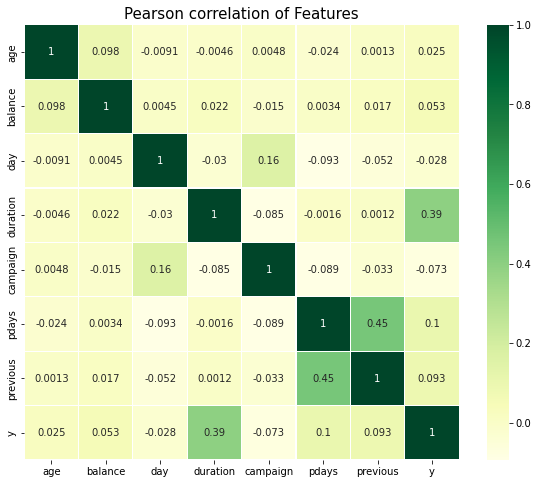

In [ ]:
# Idea of correlation matrix of numerical feature: https://medium.com/datadriveninvestor/introduction-to-exploratory-data-analysis-682eb64063ff
%matplotlib inline
corr = ndf.corr()

f, ax = plt.subplots(figsize=(10,8))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

From the above heatmap we can see that there are some numerical features which share a high correlation between them.

**Data Preprocessing**

In [ ]:
# changing categorical variable to numerical variable

ndf[['housing','loan','default']]=ndf[['housing','loan','default']].replace(["yes","no"],["1","0"])
ndf['month']=ndf['month'].replace(["jan","feb","mar","apr","may","jun","jul", "aug","sep","oct","nov","dec"],["1","2","3","4","5","6","7","8","9","10","11","12"])
ndf['job']=ndf['job'].replace(['unknown'],['other'])
ndf['contact']=ndf['contact'].replace(['unknown'],['other'])

In [ ]:
ndf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,other,5,5,4.350000,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,other,5,5,2.516667,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,other,5,5,1.266667,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,other,5,5,1.533333,1,-1,0,unknown,0
4,33,other,single,unknown,0,1,0,0,other,5,5,3.300000,1,-1,0,unknown,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ndf['job']=le.fit_transform(ndf['job'])
ndf['education']=le.fit_transform(ndf['education'])
ndf['poutcome']=le.fit_transform(ndf['poutcome'])
ndf['contact']=le.fit_transform(ndf['contact'])
ndf['marital']=le.fit_transform(ndf['marital'])

In [ ]:
ndf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,1,5,5,4.350000,1,-1,0,3,0
1,44,10,2,1,0,29,1,0,1,5,5,2.516667,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,1,5,5,1.266667,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,1,5,5,1.533333,1,-1,0,3,0
4,33,5,2,3,0,1,0,0,1,5,5,3.300000,1,-1,0,3,0


Text(0.5, 1.05, 'Pearson correlation of Features')

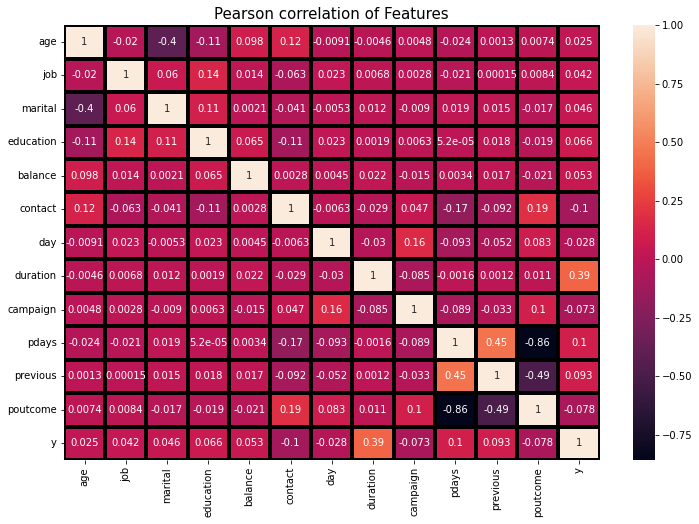

In [ ]:
corr = ndf.corr()

f, ax = plt.subplots(figsize=(12,8))

sns.heatmap(corr, ax=ax, annot=True, linewidth=3, linecolor='k')

plt.title("Pearson correlation of Features", y=1.05, size=15)

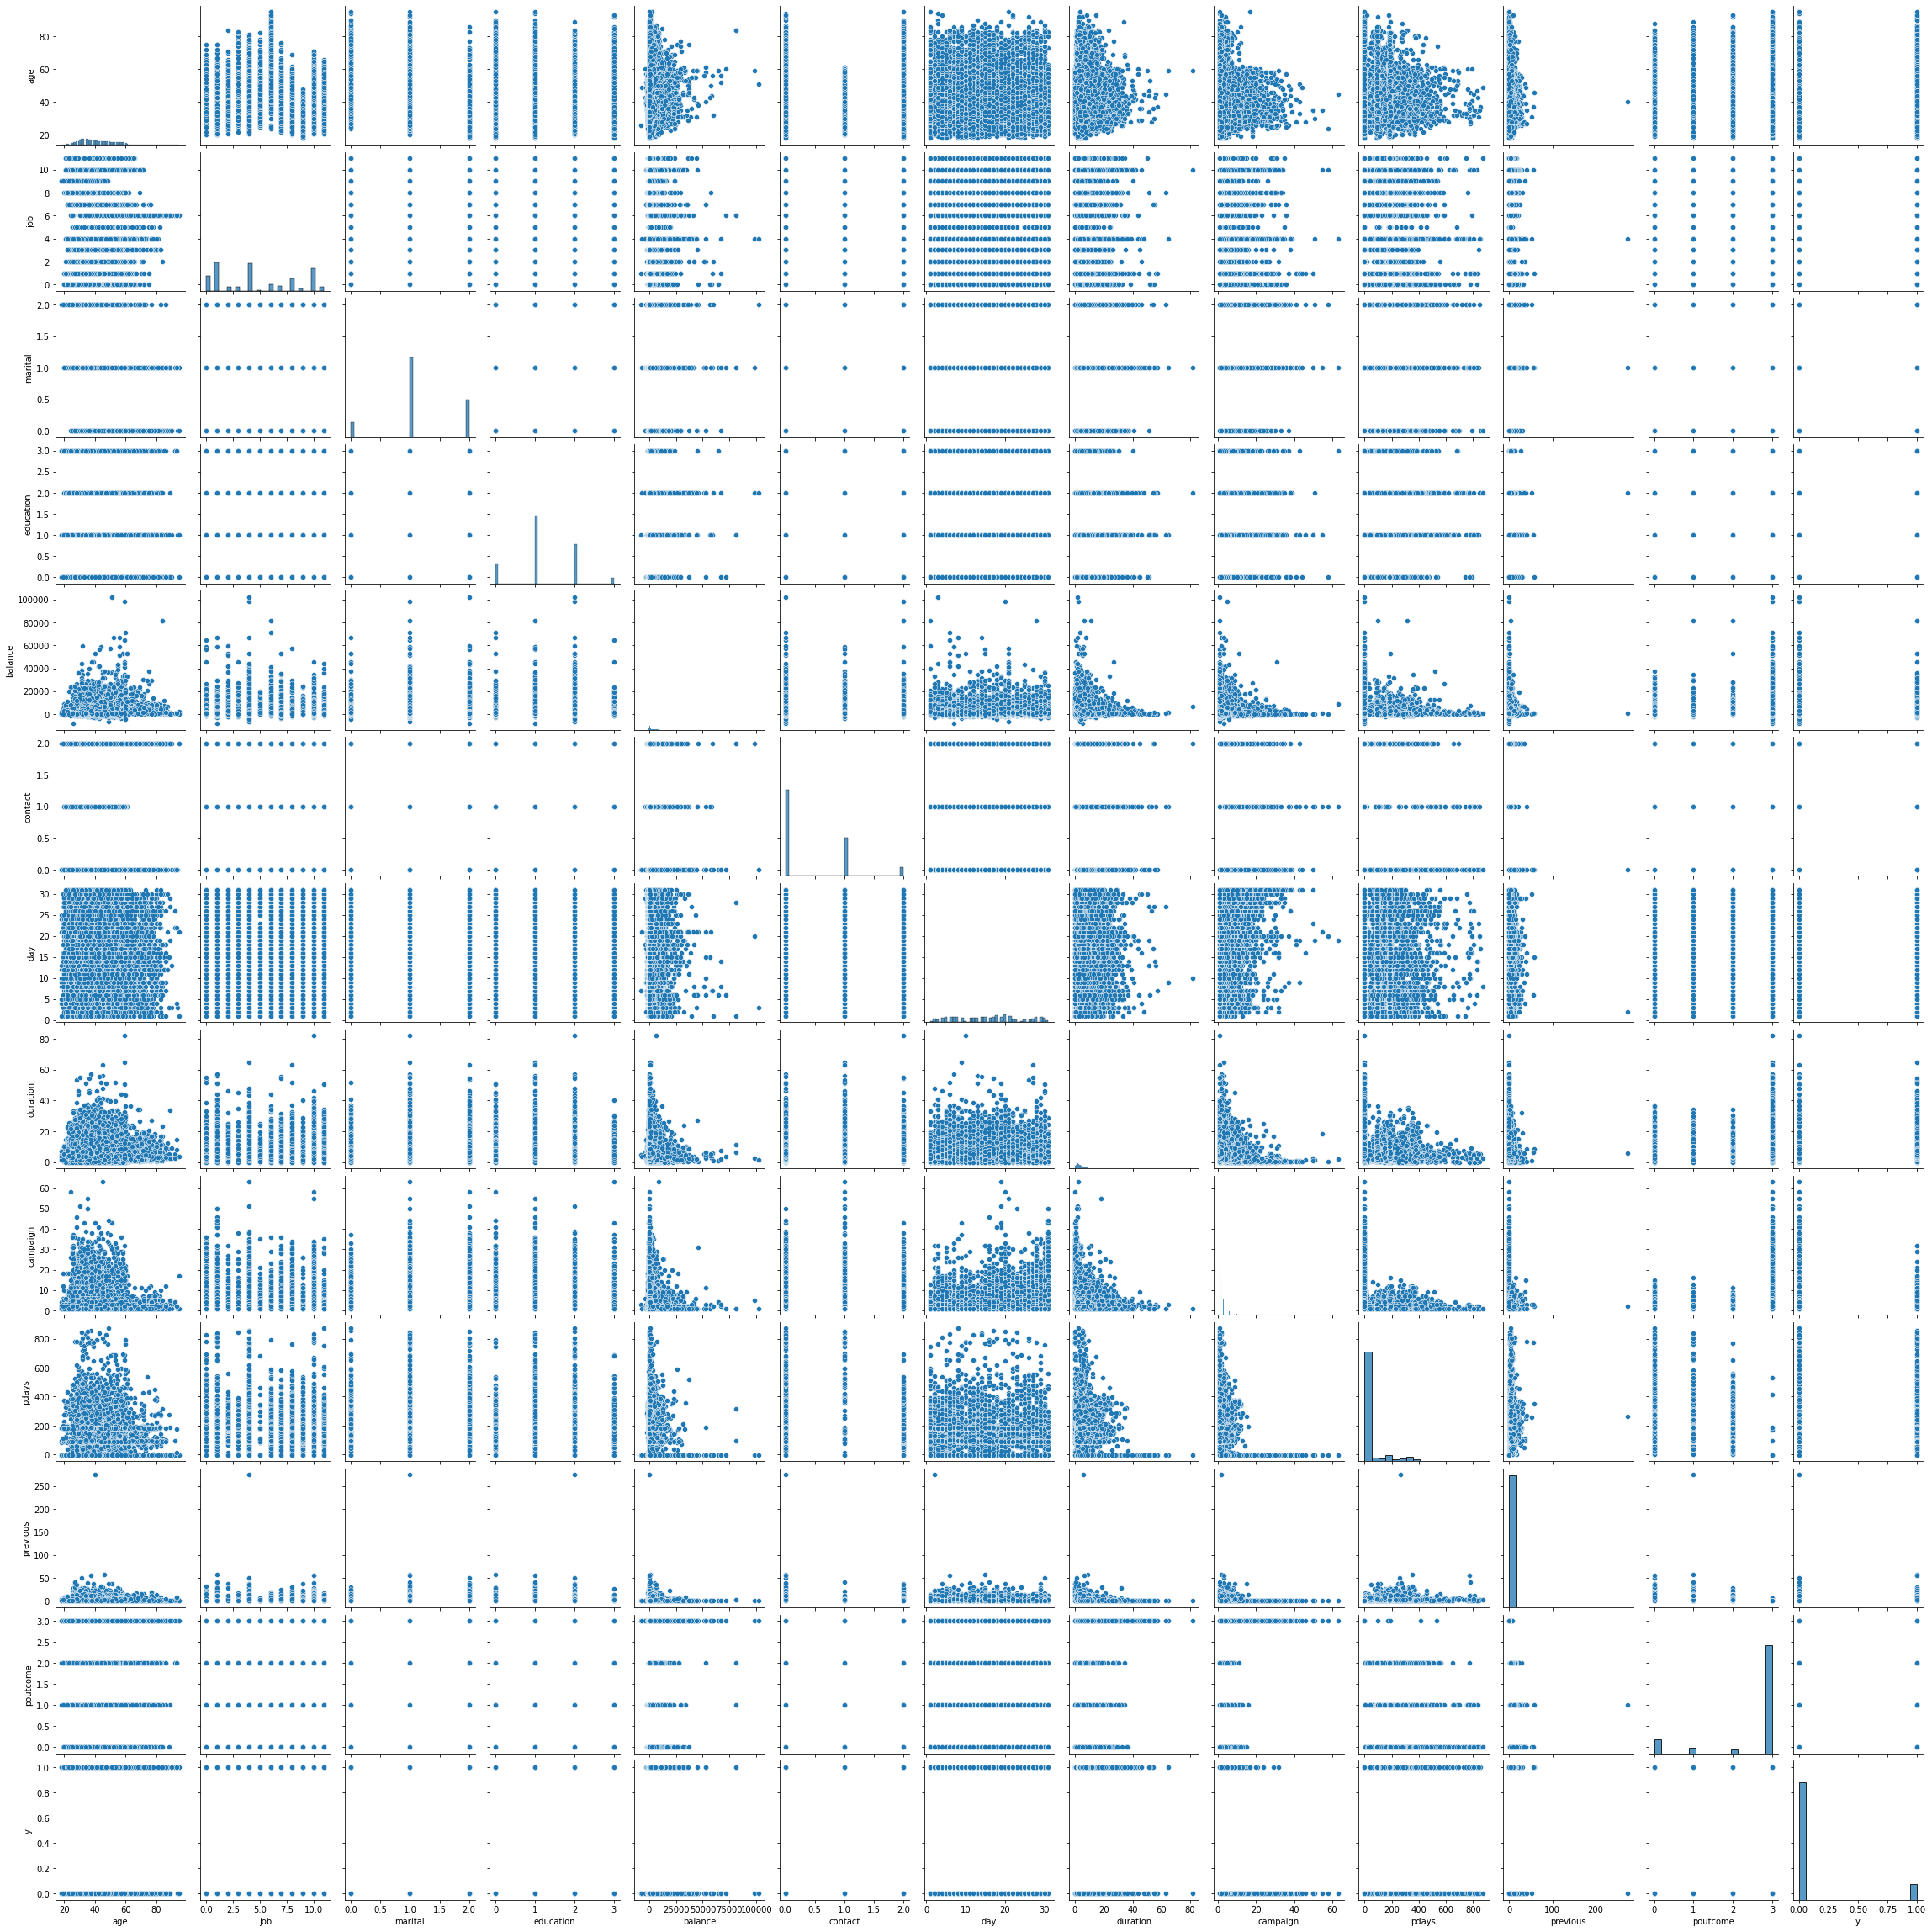

In [ ]:
sns.pairplot(ndf)

# Feature Engineering

* Drop unwanted Features
* Handle Missing Values
* Handle Categorical Features
* Handle Feature Scalling
* Remove Outliers

As per Exploratory Data Analysis EDA,

* no missing value found
* no feature found with one value
* 9 categorical features
* defaut features does not play imp role
* it seems some outliers found (age, balance, duration, compaign, pdays and previous has some outliers)

In [ ]:
#defaut features does not play imp role
ndf.groupby(['y','default']).size()

y  default
0  0          39159
   1            763
1  0           5237
   1             52
dtype: int64

In [ ]:
ndf.drop(['default'],axis=1, inplace=True)

In [ ]:
ndf['pdays'].count()

45211

In [ ]:
ndf.groupby(['y','pdays']).size()

y  pdays
0  -1       33570
    1           9
    2          35
    3           1
    4           1
            ...  
1   804         1
    805         1
    828         1
    842         1
    854         1
Length: 914, dtype: int64

In [ ]:
# drop pdays as it has -1 value for around 75%+ 
ndf.drop(['pdays'],axis=1, inplace=True)

**Outliers**

In [ ]:
# remove outliers in feature age...
ndf.groupby('age',sort=True)['age'].count()

age
18     12
19     35
20     50
21     79
22    129
     ... 
90      2
92      2
93      2
94      1
95      2
Name: age, Length: 77, dtype: int64

these can be ignored and values lies in between 18 to 95

In [ ]:
# remove outliers in feature balance...
ndf.groupby(['y','balance'],sort=True)['balance'].count()

y  balance
0  -8019      1
   -6847      1
   -4057      1
   -3372      1
   -3313      1
             ..
1   34646     1
    36252     1
    45248     1
    52587     2
    81204     2
Name: balance, Length: 9258, dtype: int64

these outlier should not be remove as balance goes high, client show interest on deposit

In [ ]:
# remove outliers in feature duration...
ndf.groupby(['y','duration'],sort=True)['duration'].count()

y  duration 
0  0.000000      3
   0.016667      2
   0.033333      3
   0.050000      4
   0.066667     15
                ..
1  51.566667     1
   51.700000     1
   53.050000     1
   54.216667     1
   64.683333     1
Name: duration, Length: 2627, dtype: int64

these outlier should not be remove as duration goes high, client show interest on deposit

In [ ]:
# remove outliers in feature campaign
ndf.groupby(['y','campaign'],sort=True)['campaign'].count()

y  campaign
0  1           14983
   2           11104
   3            4903
   4            3205
   5            1625
               ...  
1  20              1
   21              1
   24              1
   29              1
   32              1
Name: campaign, Length: 70, dtype: int64

In [ ]:
ndf.groupby('campaign',sort=True)['campaign'].count()

campaign
1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
24       20
25       22
26       13
27       10
28       16
29       16
30        8
31       12
32        9
33        6
34        5
35        4
36        4
37        2
38        3
39        1
41        2
43        3
44        1
46        1
50        2
51        1
55        1
58        1
63        1
Name: campaign, dtype: int64

In [ ]:
ndf = ndf[ndf['campaign'] < 33]

In [ ]:
# remove outliers in feature previous
ndf.groupby(['y','previous'],sort=True)['previous'].count()

y  previous
0  0           33532
   1            2189
   2            1650
   3             848
   4             543
               ...  
1  26              1
   29              1
   30              1
   55              1
   58              1
Name: previous, Length: 66, dtype: int64

In [ ]:
ndf['previous'].sort_values(ascending=False)

29182    275
38326     58
44089     55
28886     51
44822     41
        ... 
15075      0
15076      0
15077      0
15078      0
22621      0
Name: previous, Length: 45173, dtype: int64

In [ ]:
ndf = ndf[ndf['previous'] < 31]

**Model Training**

In [ ]:
##seprating independent and dependent variable

X = ndf.drop(['y'],axis=1)   #contain all  independent variable
y = ndf['y']                 #dependent variable
ndf['y'].value_counts()

0    39874
1     5287
Name: y, dtype: int64

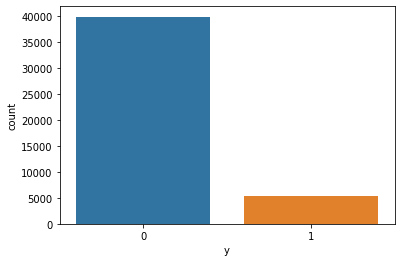

In [ ]:
# Handling imbalanced data

sns.countplot(x='y',data=ndf)

We can clearly see that there is a huge difference between the data set. Solving this issue we will use resampling technique.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

#dividing the dataset into training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3 ,random_state=0)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(31612, 14) (13549, 14) (31612,) (13549,)


In [ ]:
ndf.shape

(45161, 15)

#Function to generate model report and plot auc_roc curve

In [ ]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

#Scoring the model on train data
score_train=model.score(X_train, y_train)
print("Training score: %.2f " % score_train)

#Scoring the model on test_data
score_test=model.score(X_test, y_test)
print("Testing score: %.2f " % score_test)

Training score: 0.89 
Testing score: 0.89 


Confusion Matrix 

[[11715   244]
 [ 1281   309]]




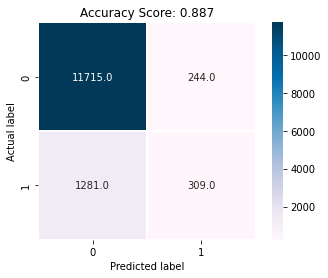

In [ ]:
acc_lr=accuracy_score(y_test,y_pred)
recall_lr=recall_score(y_test,y_pred)
precision_lr=precision_score(y_test,y_pred)
f1score_lr=f1_score(y_test,y_pred)

print("Confusion Matrix","\n")
score = round(accuracy_score(y_test, y_pred),3) 
cm1 = confusion_matrix(y_test,y_pred)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
print(cm1)
print('\n')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

In [ ]:
generate_model_report(y_test,y_pred)

Accuracy =  0.8874455679385933
Precision =  0.5587703435804702
Recall =  0.19433962264150945
F1 Score =  0.2883807746150257


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11959
           1       0.56      0.19      0.29      1590

    accuracy                           0.89     13549
   macro avg       0.73      0.59      0.61     13549
weighted avg       0.86      0.89      0.86     13549



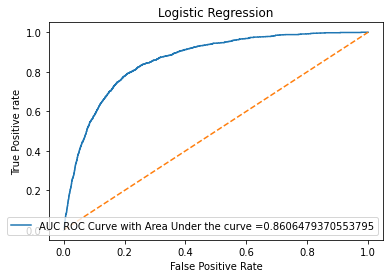

In [ ]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
AUC_LR=auc
plt.title('Logistic Regression')
plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
plt.xlabel('False Positive Rate')  # x-label
plt.ylabel('True Positive rate')  # y-label
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=4)
plt.show()

#RandomForest Classifier

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(n_estimators=100,n_jobs=100,random_state=0, min_samples_leaf=100)
randomforest.fit(X_train, y_train)
y_pred1 = randomforest.predict(X_test)

#Scoring the model on train data
score_train=randomforest.score(X_train, y_train)
print("Training score: %.2f " % score_train)

#Scoring the model on test_data
score_test=randomforest.score(X_test, y_test)
print("Testing score: %.2f " % score_test)

Training score: 0.90 
Testing score: 0.89 


Confusion Matrix 

[[11874    85]
 [ 1342   248]]




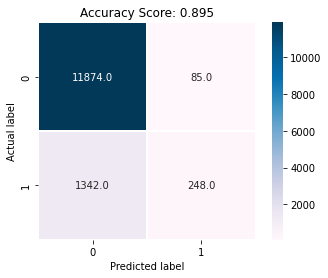

In [ ]:
acc_rf=accuracy_score(y_test,y_pred1)
recall_rf=recall_score(y_test,y_pred1)
precision_rf=precision_score(y_test,y_pred1)
f1score_rf=f1_score(y_test,y_pred1)

print("Confusion Matrix","\n")
score = round(accuracy_score(y_test, y_pred1),3) 
cm1 = confusion_matrix(y_test,y_pred1)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
print(cm1)
print('\n')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

In [ ]:
generate_model_report(y_test,y_pred1)

Accuracy =  0.8946785740645066
Precision =  0.7447447447447447
Recall =  0.1559748427672956
F1 Score =  0.2579303172126885


In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11959
           1       0.74      0.16      0.26      1590

    accuracy                           0.89     13549
   macro avg       0.82      0.57      0.60     13549
weighted avg       0.88      0.89      0.86     13549



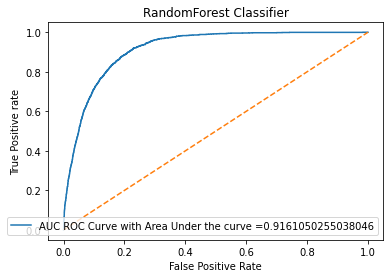

In [ ]:
y_pred_proba = randomforest.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
AUC_RF = auc
plt.title('RandomForest Classifier')
plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
plt.xlabel('False Positive Rate')  # x-label
plt.ylabel('True Positive rate')  # y-label
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=4)
plt.show()

#KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 100)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [ ]:
# check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 79}

In [ ]:
# KNN or k-Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors=79)
knn.fit(X_train, y_train)
y_pred2 = knn.predict(X_test)

#Scoring the model on train data
score_train=knn.score(X_train, y_train)
print("Training score: %.2f " % score_train)

#Scoring the model on test_data
score_test=knn.score(X_test, y_test)
print("Testing score: %.2f " % score_test)

Training score: 0.89 
Testing score: 0.89 


Confusion Matrix 

[[11824   135]
 [ 1353   237]]




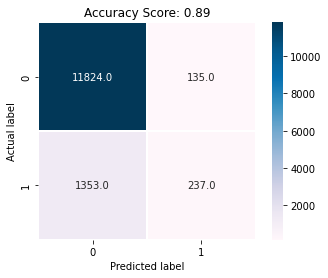

In [ ]:
acc_knn=accuracy_score(y_test,y_pred2)
recall_knn=recall_score(y_test,y_pred2)
precision_knn=precision_score(y_test,y_pred2)
f1score_knn=f1_score(y_test,y_pred2)

print("Confusion Matrix","\n")
score = round(accuracy_score(y_test, y_pred2),3) 
cm1 = confusion_matrix(y_test,y_pred2)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
print(cm1)
print('\n')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

In [ ]:
generate_model_report(y_test,y_pred2)

Accuracy =  0.8901763967820503
Precision =  0.6370967741935484
Recall =  0.1490566037735849
F1 Score =  0.24159021406727826


In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11959
           1       0.64      0.15      0.24      1590

    accuracy                           0.89     13549
   macro avg       0.77      0.57      0.59     13549
weighted avg       0.87      0.89      0.86     13549



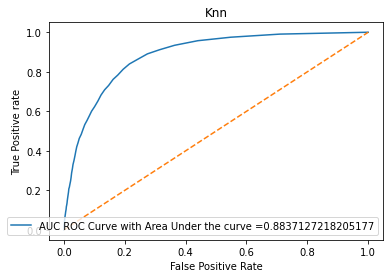

In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.title('Knn')
AUC_KN = auc
plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
plt.xlabel('False Positive Rate')  # x-label
plt.ylabel('True Positive rate')  # y-label
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=4)
plt.show()

In [ ]:
## Best model 


ind=['Logistic regression','Randomforest','KNeighbors']
data={"Accuracy":[acc_lr,acc_rf,acc_knn],"Precision":[precision_lr,precision_rf,precision_knn],"Recall":[recall_lr,recall_rf,recall_knn],
    'f1_score':[f1score_lr,f1score_rf,f1score_knn],"ROC_AUC":[AUC_LR,AUC_RF,AUC_KN]}
result=pd.DataFrame(data=ndf,index=ind)
result

print("Imbalanced Dataset")
print('\n')
print(result)

Imbalanced Dataset


                     age  job  marital  education  balance housing loan  \
Logistic regression  NaN  NaN      NaN        NaN      NaN     NaN  NaN   
Randomforest         NaN  NaN      NaN        NaN      NaN     NaN  NaN   
KNeighbors           NaN  NaN      NaN        NaN      NaN     NaN  NaN   

                     contact  day month  duration  campaign  previous  \
Logistic regression      NaN  NaN   NaN       NaN       NaN       NaN   
Randomforest             NaN  NaN   NaN       NaN       NaN       NaN   
KNeighbors               NaN  NaN   NaN       NaN       NaN       NaN   

                     poutcome   y  
Logistic regression       NaN NaN  
Randomforest              NaN NaN  
KNeighbors                NaN NaN  


In terms of Accuracy and ROC_AUC Randomforest is clear winner with 0.89 and 0.91 score but when looking at Precision & Recall huge difference found and F1_score is high for Logistic refression.